#####  k_means算法

 **1. 初始化质心**
- **输入参数**：设定簇的数量 **K**。
- **选择初始质心**：随机从数据集中选取K个点作为初始质心（也可用改进方法如K-means++优化初始化）。

 **2. 分配数据点到簇**
- **计算距离**：对每个数据点，计算其到所有质心的距离（通常用**欧氏距离**）。
- **划分簇**：将每个数据点分配到距离最近的质心对应的簇中。

**3. 更新质心位置**
- **重新计算质心**：对每个簇，计算其所有数据点的均值，将该均值作为新的质心。
  $$
  \text{质心坐标} = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i
  $$
  其中 $C_k$是第k个簇的数据点集合。
**4. 迭代终止判断**
- **终止条件**：
  - 质心的位置不再变化（或变化量小于预设阈值）。
  - 达到最大迭代次数。
  - 簇的分配不再改变。
- **循环执行**：若未满足终止条件，返回步骤2继续迭代。

优化目标：
$$
J = \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class kmeans:
    def __init__(self,data,num_clusters):
        self.data = data
        self.num_clusters = num_clusters
    def train(self , iterations):
        # 随机选择k个中心点
        centroids = kmeans.centroid_init(self.data,self.num_clusters)
        num_examples = self.data.shape[0]
        # 创建未初始化数组,值是随机值
        cloest_centroid_ids = np.empty((num_examples,1))
        for _ in range (iterations):
            # 计算每个样本点到k个中心点的距离，选取距离最小的，并成为其簇的成员
            cloest_centroid_ids = kmeans.find_cloest(self.data,centroids)
            # 更新中心点
            centroids = kmeans.change_centroids(self.data,cloest_centroid_ids,self.num_clusters)
        return centroids,cloest_centroid_ids
    @staticmethod 
    def change_centroids(data,cloest_centroid_ids,num_clusters):
        num_features = data.shape[1]
        centroids = np.zeros((num_clusters,num_features))
        for centroid_id in range(num_clusters):
            cloest_ids = cloest_centroid_ids == centroid_id
            centroids[centroid_id] = np.mean(data[cloest_ids.flatten(), :],axis = 0)
        return centroids
    @staticmethod 
    def find_cloest(data,centroids):
        num_examples = data.shape[0]
        num_centroids = centroids.shape[0]
        cloest_centroid_ids = np.zeros((num_examples,1))
        for example in range(num_examples):
            distance = np.zeros((num_centroids,1))
            for centroid in range(num_centroids):
                distance_diff = data[example,:] - centroids[centroid,:]
                distance[centroid] = np.sum(distance_diff**2)
            cloest_centroid_id = np.argmin(distance)
            cloest_centroid_ids[example] = cloest_centroid_id
        return cloest_centroid_ids
    
    @staticmethod    
    def centroid_init(data,num_clusters):
        num_examples = data.shape[0]
        """
            np.random.permutation: 返回新数组
                arr = np.array([1, 2, 3, 4])
                np.random.permutation(arr)  # 示例输出 array([3, 1, 4, 2])
                非破坏性操作：原始数据保持不变，生成一个新数组。
                随机性可控：通过 np.random.seed() 设置随机种子可复现结果
            np.random.shuffle :会原地修改原数组
            # 清洗数据操作
            indices = np.random.permutation(len(features))
            shuffled_features = features[indices]
            shuffled_labels = labels[indices]
        """
        random_ids = np.random.permutation(num_examples)
        centroids = data[random_ids[:num_clusters],:]
        return centroids


C:\Users\74203\AppData\Local\Temp\ipykernel_15700\2255215717.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


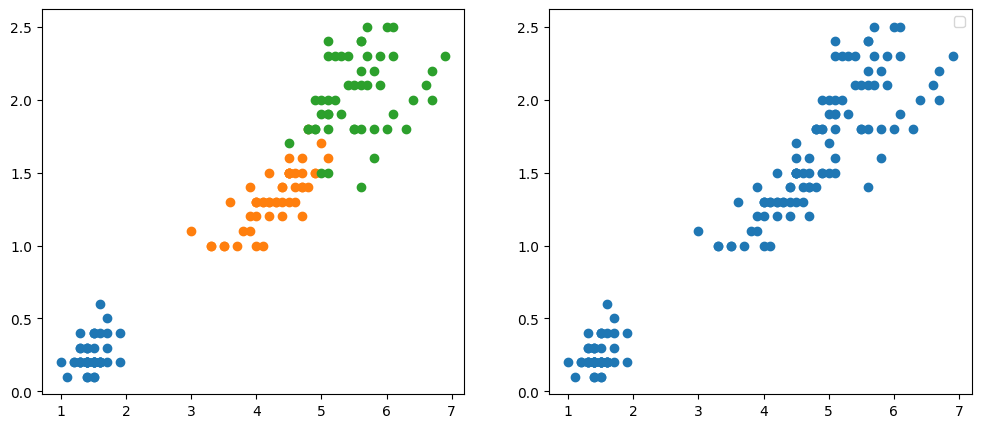

In [2]:
data = pd.read_csv('D:\Github_Files\machine_learning\machine_learning_practice\机器学习\逻辑回归\iris.csv')
iris_types = ['setosa','versicolor','virginica']
x_axis = 'Petal.Length'
y_axis = 'Petal.Width'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['Species'] == iris_type],data[y_axis][data['Species'] == iris_type])
plt.subplot(1,2,2)
plt.scatter(data[x_axis][:],data[y_axis][:])
plt.legend()
plt.show()

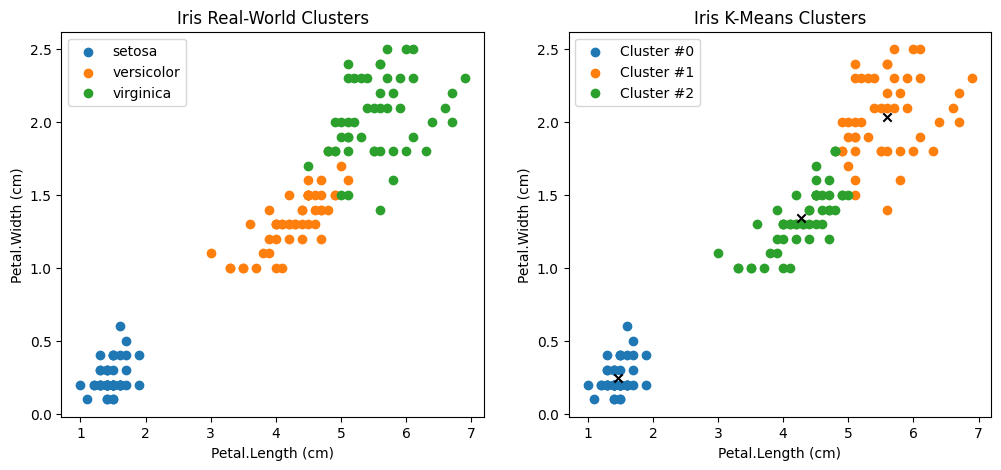

In [3]:
k = 3
num_examples = data.shape[0]
x_train = data[[x_axis,y_axis]].values.reshape((num_examples,2))
y_train = data['Species']
k_means = kmeans(x_train , k)
centroids,cloest_centroid_ids = k_means.train(50)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for iris_type in iris_types:
    plt.scatter(
        data[x_axis][data['Species'] == iris_type],
        data[y_axis][data['Species'] == iris_type],
        label=iris_type
    )
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris Real-World Clusters')
plt.legend()

plt.subplot(1, 2, 2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_indices = (cloest_centroid_ids == centroid_id).flatten()
    plt.scatter(
        data[x_axis][current_examples_indices],
        data[y_axis][current_examples_indices],
        label='Cluster #' + str(centroid_id)
    )

# Plot clusters centroids.
for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')
    
plt.xlabel(x_axis + ' (cm)')
plt.ylabel(y_axis + ' (cm)')
plt.title('Iris K-Means Clusters')
plt.legend()

##### sklearn.cluster.Kmeans

In [ ]:
# 创建聚类数据集(形状成堆)
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [
        [0.2,2.3],
        [-1.5,2.3],
        [-2.8,1.8],
        [-2.8,2.8],
        [-2.8,1.3],
    ]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])
X,y = make_blobs(n_samples=2000,centers=blob_centers,
                cluster_std=blob_std,random_state=7)

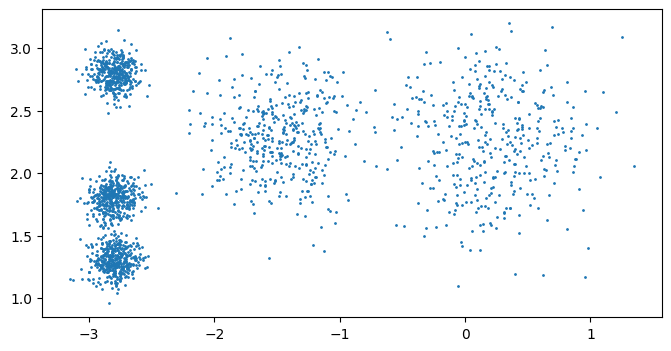

In [5]:
def plot_clustres(X,y=None):
    # s:size c:color
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
plt.figure(figsize=(8,4))
plot_clustres(X)
plt.show()

In [6]:
from sklearn.cluster import KMeans , DBSCAN
num_clusters = 5
# random_state 控制质心初始化的随机数生成的,控制初始化过程的随机性，确保结果可复现。
# 增大 n_init 参数（默认为10），让算法尝试多次初始化并选择最优解
# KMeans假设簇是凸形且方差相近，若数据不满足（如标准差差异大、簇重叠），即使固定 random_state，聚类效果仍可能不佳。
# 即使固定 random_state，聚类效果仍可能不佳。
kmeans = KMeans(n_clusters=num_clusters,random_state=42)

kmeans.fit_predict(X) 与 kmeans.labels_ 结果一致

In [7]:
y_pred = kmeans.fit_predict(X)
y1 = kmeans.predict([[0,2]])
y2 = kmeans.predict([[1,2]])
print(y1)
print(y2)

[0]
[4]


In [8]:
kmeans.labels_ # 聚类标签

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

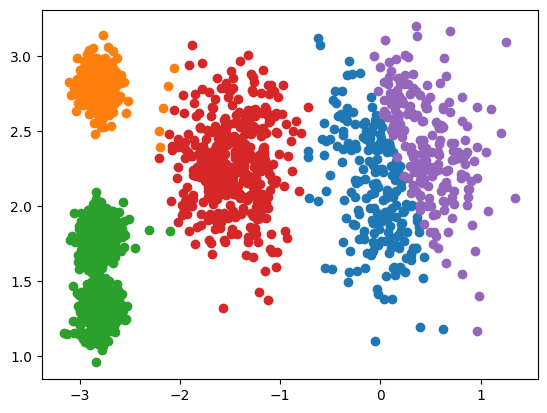

In [9]:
# TODO 绘制上图的预测结果
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y_pred == cluster],X[:,1][y_pred == cluster])
plt.show()
# 可视化没问题，k_means分类结果正是如此,random_state=42（42宇宙所有问题的答案）,当random_state=1时效果好
# 生成的数据中前两个簇的标准差较大（0.4 和 0.3），而后三个簇的标准差很小（0.1）。
# KMeans 假设簇是凸形且方差相近，若某些簇分布范围较广（标准差大），可能会导致聚类中心偏移或错误分割。


##### 不稳定性对比实验

In [ ]:
iter1 = KMeans(n_clusters=5,init='random',n_init=1,max_iter=1,random_state=1)
iter2 = KMeans(n_clusters=5,init='random',n_init=1,max_iter=2,random_state=1)
iter3 = KMeans(n_clusters=5,init='random',n_init=1,max_iter=3,random_state=1)

iter1.fit(X)  # y1.cluster_centers_
iter2.fit(X)
iter3.fit(X)

y1 = iter1.predict(X)
y2 = iter2.predict(X)
y3 = iter3.predict(X)

In [11]:
iter1.cluster_centers_  # 聚类中心

array([[ 0.20667809,  2.25769931],
       [-2.81516042,  1.24374222],
       [-2.75767277,  1.4162973 ],
       [-2.79117056,  2.30122618],
       [-1.46744042,  2.30621642]])

C:\Users\74203\AppData\Local\Temp\ipykernel_15700\68136870.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


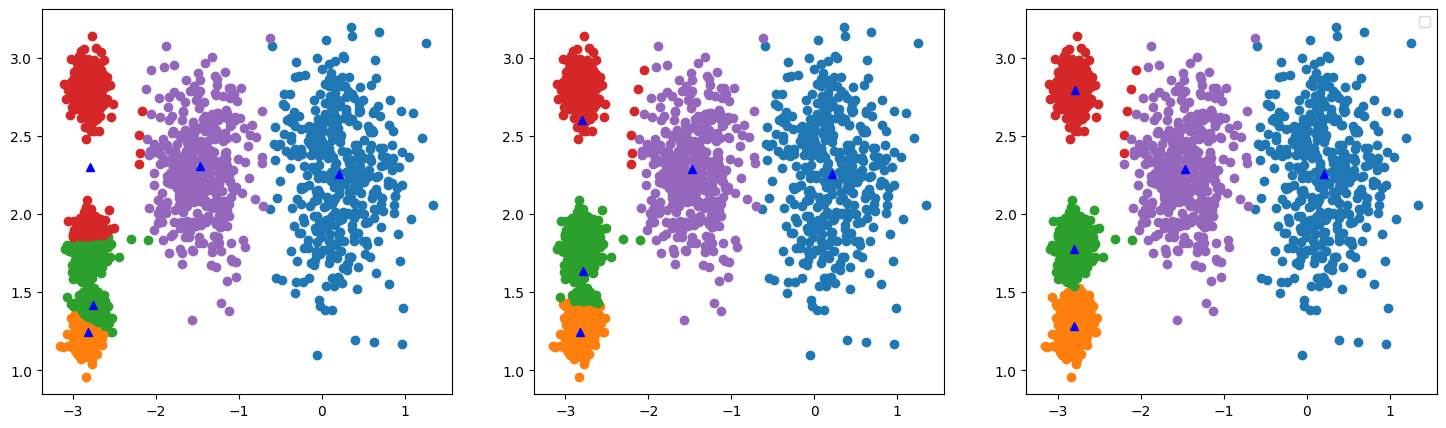

In [12]:
plt.figure(figsize=(18,5))
plt.subplot(131)
plt.plot(iter1.cluster_centers_[:,0],iter1.cluster_centers_[:,1],'b^')
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y1 == cluster],X[:,1][y1 == cluster])
plt.subplot(132)
plt.plot(iter2.cluster_centers_[:,0],iter2.cluster_centers_[:,1],'b^')
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y2 == cluster],X[:,1][y2 == cluster])
plt.subplot(133)
plt.plot(iter3.cluster_centers_[:,0],iter3.cluster_centers_[:,1],'b^')
for cluster in range(num_clusters):
    plt.scatter(X[:,0][y3 == cluster],X[:,1][y3 == cluster])
plt.legend()
plt.show()

##### 评估指标：inertia_ 所有样本与其质心的距离总和


In [26]:
kmeans.inertia_ 

224.0743312251572

In [27]:
X_dist = kmeans.transform(X) # 每个样本到各个簇质心的距离
X_dist

array([[2.73844431, 1.45402521, 0.23085922, 1.54204522, 3.34391922],
       [2.82306816, 0.99002955, 0.26810747, 1.47805666, 3.39912897],
       [1.38822261, 4.09069201, 3.78216716, 2.67794429, 1.33653447],
       ...,
       [2.80678045, 0.06769209, 1.17785478, 1.40106167, 3.28864968],
       [0.42764894, 3.05913478, 3.15905017, 1.71924814, 0.23020951],
       [2.5754254 , 0.85434589, 0.43658314, 1.20868514, 3.1420062 ]])

In [28]:
kmeans.labels_

array([2, 2, 4, ..., 1, 4, 2], dtype=int32)

In [30]:
#  每个样本距离最近的质心的距离
X_cloest_dist = X_dist[np.arange(len(X_dist)),kmeans.labels_]
np.sum(X_cloest_dist**2)

np.float64(224.07433122515903)

##### 如何确定k值最优
- K越大，inertia约小

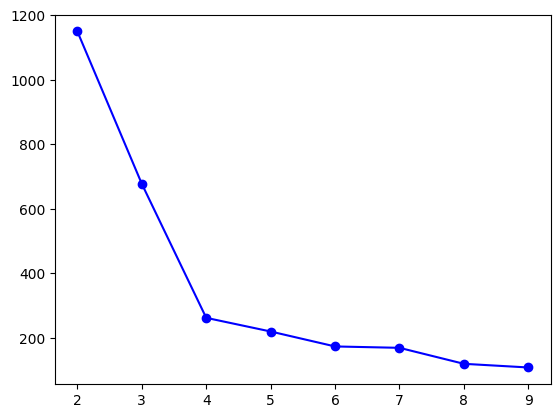

In [38]:
kmeans_k = [KMeans(n_clusters=k).fit(X) for k in range(2,10)]
inertias = [model.inertia_ for model in kmeans_k]
plt.plot(range(2,10),inertias,'bo-')
plt.show()

##### 轮廓系数  接近1好

轮廓系数（Silhouette Coefficient）是一种用于评估聚类算法效果的指标，尤其适用于无监督学习中数据没有真实标签的情况。它衡量了样本在自身簇内的紧密性（凝聚度）与其他簇的分离度，帮助判断聚类的合理性和质量。

**1. 轮廓系数的定义**
- **范围**：[-1, 1]
  - **接近1**：样本聚类合理，簇内紧密且远离其他簇。
  - **接近0**：样本可能处于两个簇的边界。
  - **接近-1**：样本可能被分配到错误的簇。

---

 **2. 计算方法**
**单个样本的轮廓系数**  
对样本 $i$：  
1. **凝聚度（$a(i)$）**：样本 $i$ 到同簇其他样本的平均距离。  
   $ a(i) = \frac{1}{|C_i| - 1} \sum_{j \in C_i, j \neq i} \text{distance}(i, j) $  
2. **分离度（$b(i)$）**：样本 $i$ 到最近其他簇所有样本的平均距离。  
   $ b(i) = \min_{C_k \neq C_i} \left( \frac{1}{|C_k|} \sum_{j \in C_k} \text{distance}(i, j) \right) $  
3. **轮廓系数 $s(i)$**：  
   $ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} $

**整体数据集的轮廓系数**  
所有样本轮廓系数的平均值：  
$ \text{Silhouette Score} = \frac{1}{n} \sum_{i=1}^n s(i) $




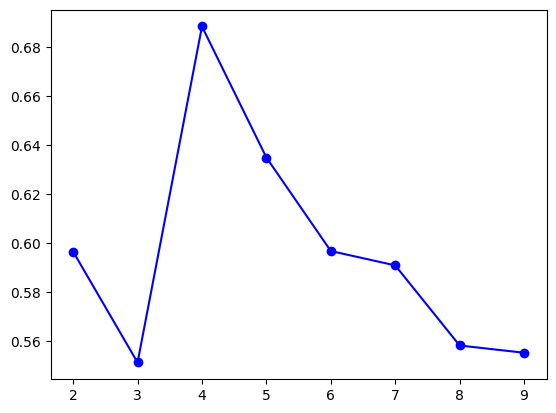

In [39]:
from sklearn.metrics  import silhouette_score
silhouette_scores = [silhouette_score(X,model.labels_)for model in  kmeans_k]
plt.plot(range(2,10),silhouette_scores,'bo-')
plt.show()

##### k_means存在的问题
- inertia小， 不代表聚类效果好

In [ ]:

X1,y1 = make_blobs(n_samples=1000, centers = ((4,-4),(0,0)),random_state=42)
X1 = X1.dot(np.array([[0.374,0.95],[0.732,0.598]]))
X2,y2 = make_blobs(n_samples=250, centers = 1,random_state=42)
X2 = X2 + [6,-8]
# np.r_ 沿行方向（axis=0）拼接数组，类似 np.concatenate(axis=0) 或 np.vstack。
X = np.r_[X1,X2]
y = np.r_[y1,y2]

 **1.`np.c_` vs `np.r_`**
| 操作       | 方向           | 输入一维数组的处理               | 典型用途                  |
|------------|----------------|----------------------------------|-------------------------|
| **`np.c_`** | 按列拼接（`axis=1`） | 转为列向量（`shape=(n, 1)`）      | 构造特征矩阵（多列合并）  |
| **`np.r_`** | 按行拼接（`axis=0`） | 保持一维或升维为行向量（`shape=(1, n)`） | 合并样本或序列生成        |

```python
a = [1, 2]
b = [3, 4]

print(np.c_[a, b])  # 输出: [[1 3], [2 4]]
print(np.r_[a, b])  # 输出: [1 2 3 4]
```

**2. `np.c_` vs `np.column_stack`**
- `np.c_` 是 `np.column_stack` 的语法糖，但更简洁：
  ```python
  np.c_[a, b]  # 等价于 np.column_stack((a, b))
  ```

---

 **1. 添加偏置项（Bias Term）**
在机器学习中为特征矩阵添加全1列（对应截距项）：
```python
X = np.array([[1, 2], [3, 4], [5, 6]])
X_with_bias = np.c_[np.ones(X.shape[0]), X]
print(X_with_bias)
# 输出:
# [[1. 1. 2.]
#  [1. 3. 4.]
#  [1. 5. 6.]]
```
**2. 混合一维和二维数组**
```python
a = np.array([1, 2, 3])
b = np.array([[4, 5], [6, 7], [8, 9]])
c = np.array([10, 11, 12])

result = np.c_[a, b, c]
print(result)
# 输出:
# [[ 1  4  5 10]
#  [ 2  6  7 11]
#  [ 3  8  9 12]]
```
**3. 生成网格坐标**
结合 `np.mgrid` 生成坐标点：
```python
x = np.array([1, 2, 3])
y = np.array([4, 5])

# 生成网格点坐标矩阵
X, Y = np.meshgrid(x, y)
coordinates = np.c_[X.ravel(), Y.ravel()]
print(coordinates)
# 输出:
# [[1 4]
#  [2 4]
#  [3 4]
#  [1 5]
#  [2 5]
#  [3 5]]
```


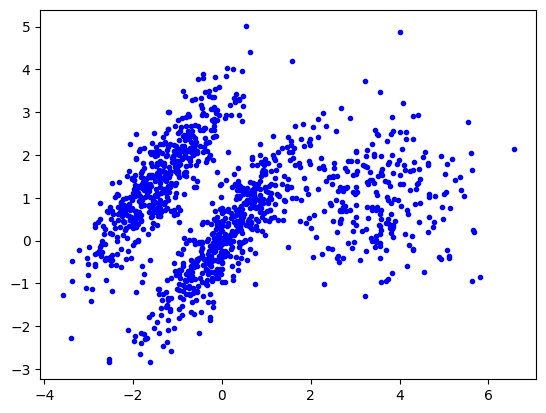

In [50]:
plt.plot(X[:,0],X[:,1], 'b.')
plt.show()

In [52]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [54]:
kmeans_good = KMeans(n_clusters=3,init=np.array([[-1.5,2.5],[0.5,0],[4,0]]),n_init=1,random_state=1)
kmeans_bad = KMeans(n_clusters=3,random_state=1)

kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=1)

C:\Users\74203\AppData\Local\Temp\ipykernel_15700\625672403.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


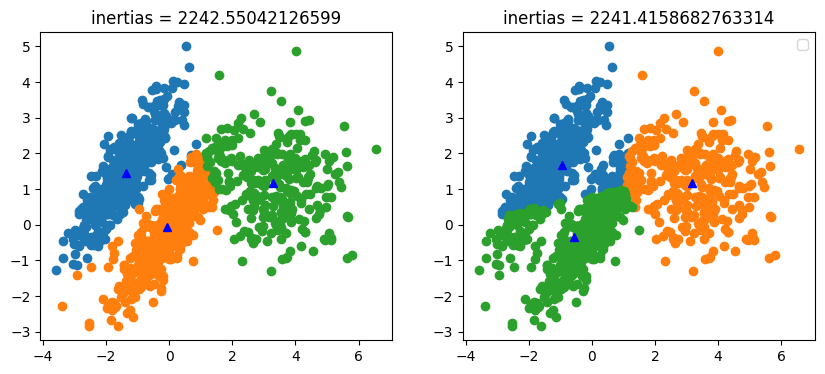

In [56]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(kmeans_good.cluster_centers_[:,0],kmeans_good.cluster_centers_[:,1],'b^')
for cluster in range(3):
    plt.scatter(X[:,0][kmeans_good.labels_ == cluster],X[:,1][kmeans_good.labels_ == cluster])
plt.title(f'inertias = {kmeans_good.inertia_}')


plt.subplot(122)
plt.plot(kmeans_bad.cluster_centers_[:,0],kmeans_bad.cluster_centers_[:,1],'b^')
for cluster in range(3):
    plt.scatter(X[:,0][kmeans_bad.labels_ == cluster],X[:,1][kmeans_bad.labels_ == cluster])
plt.title(f'inertias = {kmeans_bad.inertia_}')
plt.legend()
plt.show()

K_means应用 --- 图像分割

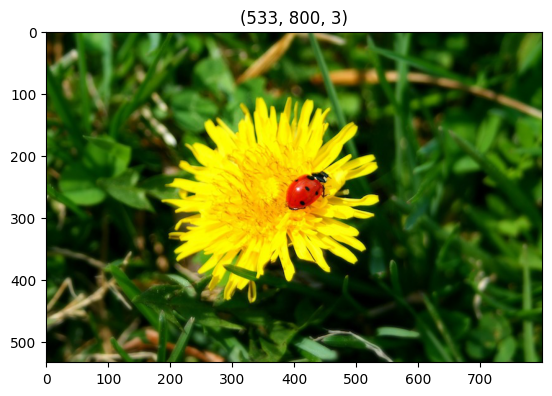

In [71]:
from matplotlib.image import imread
img = imread('ladybug.png')
plt.title(img.shape)
plt.imshow(img)

In [72]:
X = img.reshape(-1,3)
X.shape

(426400, 3)

In [73]:
img_kmeans = KMeans(n_clusters=8,random_state=42).fit(X)
img_kmeans.cluster_centers_

array([[0.02201948, 0.10826439, 0.00567489],
       [0.98317236, 0.9328145 , 0.02554234],
       [0.2132549 , 0.38074106, 0.05517892],
       [0.6083286 , 0.6286    , 0.38572747],
       [0.3667758 , 0.51952744, 0.1532005 ],
       [0.09565558, 0.24867332, 0.0160392 ],
       [0.76499236, 0.19946557, 0.04393002],
       [0.87636715, 0.71767735, 0.0367492 ]], dtype=float32)

In [79]:
segmented_img = img_kmeans.cluster_centers_[img_kmeans.labels_]
segmented_img

array([[0.13373834, 0.26556614, 0.04001015],
       [0.13373834, 0.26556614, 0.04001015],
       [0.13373834, 0.26556614, 0.04001015],
       ...,
       [0.13373834, 0.26556614, 0.04001015],
       [0.13373834, 0.26556614, 0.04001015],
       [0.13373834, 0.26556614, 0.04001015]], dtype=float32)

In [80]:
segmented_img = segmented_img.reshape(img.shape)
segmented_img

array([[[0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        ...,
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015]],

       [[0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        ...,
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015]],

       [[0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        ...,
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015]],

       ...,

       [[0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0.26556614, 0.04001015],
        [0.13373834, 0

In [ ]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    img_kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = img_kmeans.cluster_centers_[img_kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(img.shape))


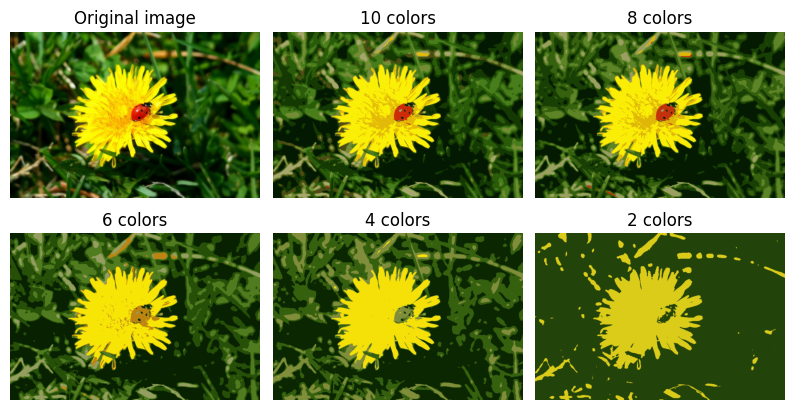

In [77]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(img)
plt.title("Original image")
plt.axis('off')
for idx, n_clusters in enumerate(n_colors):
   plt.subplot(232 + idx)
   plt.imshow(segmented_imgs[idx])
   plt.title("{} colors".format(n_clusters))
   plt.axis('off')
plt.show()